In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
from matplotlib_venn import venn2

In [2]:
input_dir = '/cellar/users/snwright/Data/RareCommon/inputs/'
output_dir = '/cellar/users/snwright/Data/RareCommon/outputs/'
figdir = '/cellar/users/snwright/Data/Transfer/RVC/figures/Gene_Overlap/'

In [3]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['xtick.minor.width'] = 0.3
plt.rcParams['ytick.minor.width'] = 0.3
plt.rcParams['legend.frameon'] = False
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['xtick.major.pad'] = 1
plt.rcParams['ytick.major.pad'] = 1
plt.rcParams['axes.labelpad'] = 1
plt.rcParams['patch.linewidth'] = 0.25

## High-throughput

In [4]:
results_groups = ['defaults', 'defaults_9k', 'sig_only', 'sig_only_9k']
params_file = 'overlap_params.txt'

In [5]:
overlap_results = []
for group in results_groups:
    group_df = pd.read_csv(os.path.join(output_dir, f'overlap_results.{group}.txt'), sep='\t', header=None)
    group_df.columns = ['trait_pair', 'param_set', 'n_common', 'n_rare', 'n_overlap', 'background', 'pval']
    overlap_results.append(group_df)
overlap_df = pd.concat(overlap_results)

In [6]:
overlap_df.head()

,trait_pair,param_set,n_common,n_rare,n_overlap,background,pval
0,EFO_0000095_EFO_0000095,defaults,59,8,0,20000,0.023362
1,EFO_0000182_EFO_0000182,defaults,12,4,0,20000,0.002398
2,EFO_0000198_EFO_0000198,defaults,7,18,0,20000,0.006284
3,EFO_0000217_EFO_0000217,defaults,5,66,0,20000,0.016393
4,EFO_0000266_EFO_0000266,defaults,13,20,0,20000,0.012926


### Default vs sig

All gene set counts

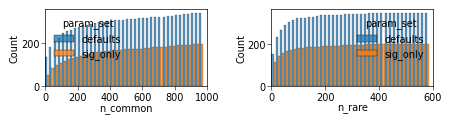

In [7]:
_, [ax1, ax2] = plt.subplots(1, 2, figsize=(5, 1), gridspec_kw={'wspace':0.4})
sns.histplot(overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])], bins=[i*25 for i in range(40)], hue='param_set', 
                x='n_common', multiple='dodge', log_scale=False, cumulative=True, ax=ax1)
ax1.set_xlim(0,1000)
sns.histplot(overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])], bins=[i*15 for i in range(40)], hue='param_set', 
                x='n_rare', multiple='dodge', log_scale=False, cumulative=True, ax=ax2)
ax2.set_xlim(0,600)
plt.savefig(os.path.join(figdir, 'cumulative_traits_significance_filter_bars.png'), dpi=300, bbox_inches='tight')

All gene set counts < 10

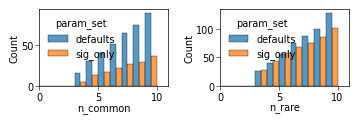

In [8]:
_, [ax1, ax2] = plt.subplots(1, 2, figsize=(4, 1), gridspec_kw={'wspace':0.4})
sns.histplot(overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])], bins=[i for i in range(11)], hue='param_set', 
                x='n_common', multiple='dodge', log_scale=False, cumulative=True, ax=ax1)
ax1.set_xlim(0,11)
sns.histplot(overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])], bins=[i for i in range(11)], hue='param_set', 
                x='n_rare', multiple='dodge', log_scale=False, cumulative=True, ax=ax2)
ax2.set_xlim(0,11)
plt.savefig(os.path.join(figdir, 'cumutative_traits_significance_filter_bars_less_than_10genes.png'), dpi=300, bbox_inches='tight')

Overlapping genes

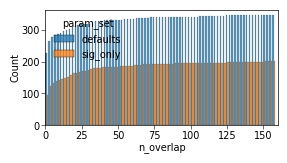

In [9]:
_, ax1 = plt.subplots(1, 1, figsize=(3, 1.5))
sns.histplot(overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])], bins=[i*2 for i in range(80)], hue='param_set', 
                x='n_overlap', multiple='dodge', log_scale=False, cumulative=True, ax=ax1)
ax1.set_xlim(0,160)
plt.savefig(os.path.join(figdir, 'cumulative_traits_overlapping_significance_filter_bars.png'), dpi=300, bbox_inches='tight')

In [10]:
overlap_df = overlap_df.sort_values(by='trait_pair')

In [11]:
overlap_df.pivot_table(index='trait_pair', columns='param_set', values='n_common')

param_set,defaults,defaults_9k,sig_only,sig_only_9k
trait_pair,,,,
EFO_0000095_EFO_0000095,59.0,59.0,26.0,26.0
EFO_0000182_EFO_0000182,12.0,12.0,NaN,NaN
EFO_0000198_EFO_0000198,7.0,7.0,NaN,NaN
EFO_0000217_EFO_0000217,5.0,5.0,NaN,NaN
EFO_0000266_EFO_0000266,13.0,13.0,9.0,9.0
...,...,...,...,...
MONDO_0007915_MONDO_0007915,298.0,298.0,221.0,221.0
MONDO_0008315_MONDO_0008315,348.0,348.0,308.0,308.0
MONDO_0008903_MONDO_0008903,92.0,92.0,33.0,33.0


In [12]:
overlap_df.pivot_table(index='trait_pair', columns='param_set', values='n_common')

param_set,defaults,defaults_9k,sig_only,sig_only_9k
trait_pair,,,,
EFO_0000095_EFO_0000095,59.0,59.0,26.0,26.0
EFO_0000182_EFO_0000182,12.0,12.0,NaN,NaN
EFO_0000198_EFO_0000198,7.0,7.0,NaN,NaN
EFO_0000217_EFO_0000217,5.0,5.0,NaN,NaN
EFO_0000266_EFO_0000266,13.0,13.0,9.0,9.0
...,...,...,...,...
MONDO_0007915_MONDO_0007915,298.0,298.0,221.0,221.0
MONDO_0008315_MONDO_0008315,348.0,348.0,308.0,308.0
MONDO_0008903_MONDO_0008903,92.0,92.0,33.0,33.0


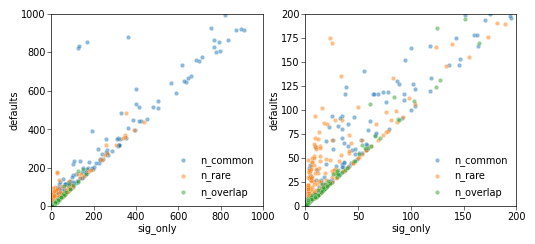

In [13]:
_, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 2.5))
sns.scatterplot(overlap_df.pivot_table(index='trait_pair', columns='param_set', values='n_common'), y='defaults', 
                x='sig_only', label='n_common', alpha=0.5, ax=ax1, s=10)
sns.scatterplot(overlap_df.pivot_table(index='trait_pair', columns='param_set', values='n_rare'), y='defaults', 
                x='sig_only', label='n_rare', alpha=0.5, ax=ax1, s=10)
sns.scatterplot(overlap_df.pivot_table(index='trait_pair', columns='param_set', values='n_overlap'), y='defaults', 
                x='sig_only', label='n_overlap', alpha=0.5, ax=ax1, s=10)
ax1.set_xlim(0, 1000)
ax1.set_ylim(0, 1000)
sns.scatterplot(overlap_df.pivot_table(index='trait_pair', columns='param_set', values='n_common'), y='defaults', 
                x='sig_only', label='n_common', alpha=0.5, ax=ax2, s=10)
sns.scatterplot(overlap_df.pivot_table(index='trait_pair', columns='param_set', values='n_rare'), y='defaults', 
                x='sig_only', label='n_rare', alpha=0.5, ax=ax2, s=10)
sns.scatterplot(overlap_df.pivot_table(index='trait_pair', columns='param_set', values='n_overlap'), y='defaults', 
                x='sig_only', label='n_overlap', alpha=0.5, ax=ax2, s=10)

ax2.set_xlim(0, 200)
ax2.set_ylim(0, 200)
plt.savefig(os.path.join(figdir, 'scatter_default_vs_sig_only_gene_counts.png'), dpi=300, bbox_inches='tight')

In [14]:
overlap_df.head()

,trait_pair,param_set,n_common,n_rare,n_overlap,background,pval
0,EFO_0000095_EFO_0000095,defaults,59,8,0,20000,0.023362
0,EFO_0000095_EFO_0000095,defaults_9k,59,8,0,9415,0.049065
0,EFO_0000095_EFO_0000095,sig_only_9k,26,8,0,9415,0.021888
0,EFO_0000095_EFO_0000095,sig_only,26,8,0,20000,0.010355
1,EFO_0000182_EFO_0000182,defaults_9k,12,4,0,9415,0.005089


In [15]:
overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])].melt(id_vars=['param_set', 'trait_pair', 'background', 'pval'], value_vars=['n_common', 'n_rare', 'n_overlap'])

,param_set,trait_pair,background,pval,variable,value
0,defaults,EFO_0000095_EFO_0000095,20000,2.336181e-02,n_common,59
1,sig_only,EFO_0000095_EFO_0000095,20000,1.035461e-02,n_common,26
2,defaults,EFO_0000182_EFO_0000182,20000,2.398021e-03,n_common,12
3,defaults,EFO_0000198_EFO_0000198,20000,6.283956e-03,n_common,7
4,defaults,EFO_0000217_EFO_0000217,20000,1.639309e-02,n_common,5
...,...,...,...,...,...,...
1651,defaults,MONDO_0008903_MONDO_0008903,20000,3.401441e-03,n_overlap,1
1652,sig_only,MONDO_0008903_MONDO_0008903,20000,2.735146e-04,n_overlap,1
1653,defaults,MONDO_0018309_MONDO_0018309,20000,4.199055e-10,n_overlap,2
1654,sig_only,MONDO_0018309_MONDO_0018309,20000,1.200135e-11,n_overlap,2


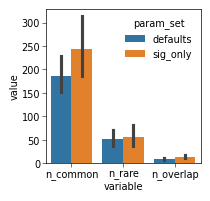

In [16]:
_, ax = plt.subplots(1, 1, figsize=(2,2))
sns.barplot(overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])].melt(id_vars=['param_set', 'trait_pair', 'background', 'pval'], value_vars=['n_common', 'n_rare', 'n_overlap']), 
            x='variable', y='value', hue='param_set', estimator='mean', ax=ax)
plt.savefig(os.path.join(figdir, 'default_vs_sig_only_gene_counts.png'), dpi=300, bbox_inches='tight')

In [17]:
overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])].melt(id_vars=['param_set', 'trait_pair', 'background', 'pval'], value_vars=['n_common', 'n_rare', 'n_overlap']).head()

,param_set,trait_pair,background,pval,variable,value
0,defaults,EFO_0000095_EFO_0000095,20000,0.023362,n_common,59
1,sig_only,EFO_0000095_EFO_0000095,20000,0.010355,n_common,26
2,defaults,EFO_0000182_EFO_0000182,20000,0.002398,n_common,12
3,defaults,EFO_0000198_EFO_0000198,20000,0.006284,n_common,7
4,defaults,EFO_0000217_EFO_0000217,20000,0.016393,n_common,5


In [18]:
overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])].melt(id_vars=['param_set', 'trait_pair', 'background', 'pval'], value_vars=['n_common', 'n_rare', 'n_overlap']).groupby(['param_set', 'variable']).value.describe()

count        mean         std  min    25%   50%     75%  \
param_set variable                                                             
defaults  n_common   350.0  186.368571  403.138808  3.0  10.00  45.5  179.50   
          n_overlap  350.0    8.774286   24.910911  0.0   0.00   0.0    3.00   
          n_rare     350.0   51.594286  164.142858  3.0   8.00  17.0   41.00   
sig_only  n_common   202.0  243.935644  462.203462  3.0  23.25  78.5  311.75   
          n_overlap  202.0   13.351485   27.326845  0.0   0.00   2.0   14.75   
          n_rare     202.0   56.554455  168.178564  3.0   5.00  10.5   37.75   

                        max  
param_set variable           
defaults  n_common   5481.0  
          n_overlap   194.0  
          n_rare     2217.0  
sig_only  n_common   5152.0  
          n_overlap   165.0  
          n_rare     1736.0

P-values

In [19]:
overlap_df['logp'] = -np.log10(overlap_df.pval + 1e-50)

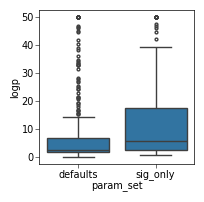

In [20]:
#sns.barplot(overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])], x = 'param_set', y = 'logp', estimator='median')
_, ax = plt.subplots(1, 1, figsize=(2,2))
sns.boxplot(overlap_df[overlap_df.param_set.isin(['defaults', 'sig_only'])], x = 'param_set', y = 'logp', ax=ax, fliersize=2)
plt.savefig(os.path.join(figdir, 'default_vs_sig_only_overlap_sig.png'), dpi=300, bbox_inches='tight')

### Background comparison

<Axes: xlabel='background', ylabel='logp'>

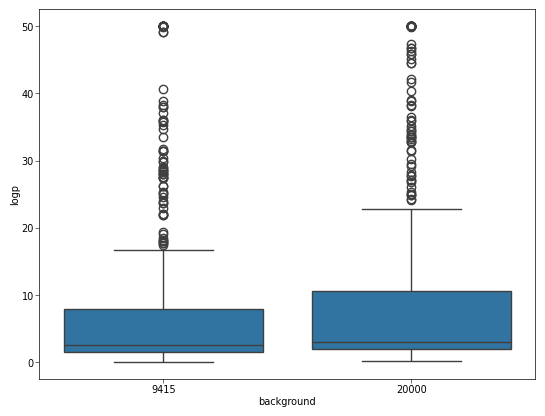

In [21]:
sns.boxplot(overlap_df, x = 'background', y = 'logp')

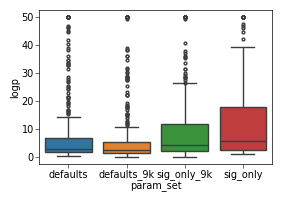

In [22]:
_, ax = plt.subplots(1,1, figsize=(3, 2))
sns.boxplot(overlap_df, x = 'param_set', y = 'logp', hue='param_set', fliersize=2)
plt.savefig(os.path.join(figdir, 'default_sig_bkgnd_overlap_sig.png'), dpi=300, bbox_inches='tight')

## Results of 9k analysis

In [23]:
k9_df = overlap_df[overlap_df.param_set.str.contains('9k')]
k9_df = k9_df.sort_values(by='pval', ascending=True)

In [24]:
k9_df['expected'] = k9_df.apply(lambda x: hypergeom.mean(x.background, x.n_common, x.n_rare), axis=1)

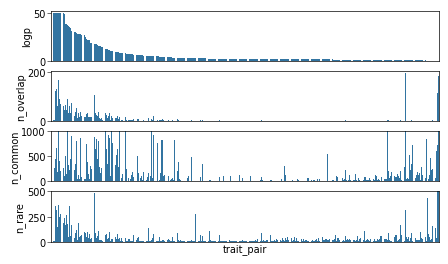

In [25]:
_, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(5, 3), sharex=True)
sns.barplot(k9_df[k9_df.param_set=='defaults_9k'], x = 'trait_pair', y = 'logp', ax=ax1)
sns.barplot(k9_df[k9_df.param_set=='defaults_9k'], x = 'trait_pair', y = 'n_overlap', ax=ax2, zorder=10)
sns.barplot(k9_df[k9_df.param_set=='defaults_9k'], x = 'trait_pair', y = 'n_common', ax=ax3)
sns.barplot(k9_df[k9_df.param_set=='defaults_9k'], x = 'trait_pair', y = 'n_rare', ax=ax4)
_ = plt.xticks([])
ax3.set_ylim(0, 1000)
ax4.set_ylim(0, 500)
plt.savefig(os.path.join(figdir, 'overlap_sig_vs_seed_gene_counts.png'), dpi=300, bbox_inches='tight')

In [26]:
k9_df.head()

,trait_pair,param_set,n_common,n_rare,n_overlap,background,pval,logp,expected
179,EFO_0005208_EFO_0005208,defaults_9k,825,3,3,9415,0.0,50.0,0.262878
106,EFO_0005208_EFO_0005208,sig_only_9k,771,3,3,9415,0.0,50.0,0.245672
151,EFO_0004630_EFO_0004630,defaults_9k,15,3,3,9415,0.0,50.0,0.004780
147,EFO_0009767_EFO_0009767,sig_only_9k,262,3,3,9415,0.0,50.0,0.083484
86,EFO_0004630_EFO_0004630,sig_only_9k,9,3,3,9415,0.0,50.0,0.002868


In [27]:
k9_df['oe'] = k9_df.n_overlap / k9_df.expected

<Axes: xlabel='oe', ylabel='Count'>

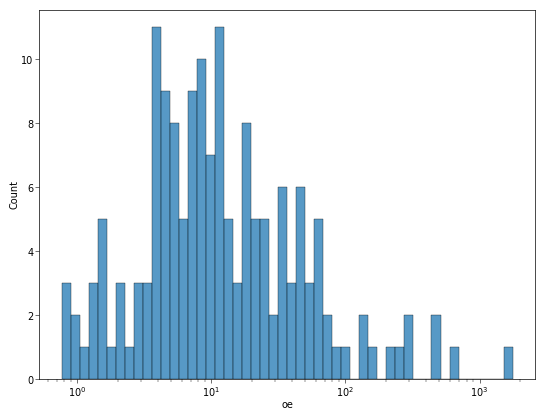

In [28]:
sns.histplot(k9_df[k9_df.param_set=='defaults_9k'], x='oe', log_scale=True, bins=50)

<Axes: xlabel='oe', ylabel='logp'>

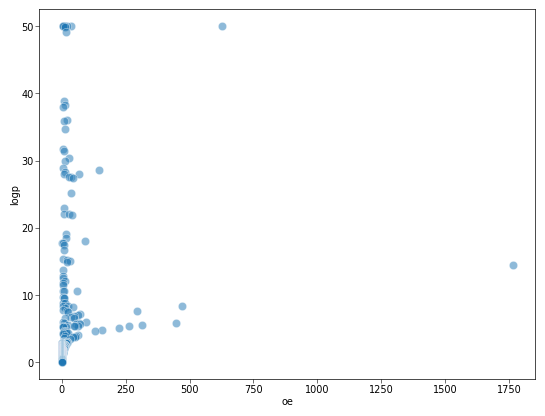

In [29]:
sns.scatterplot(k9_df[k9_df.param_set=='defaults_9k'], x='oe', y='logp', alpha=0.5)

In [30]:
k9_df['rare_only'] = k9_df.n_rare - k9_df.n_overlap
k9_df['common_only'] = k9_df.n_common - k9_df.n_overlap
k9_df['total'] = k9_df.rare_only + k9_df.common_only + k9_df.n_overlap
k9_df['overlap+rare'] = k9_df.n_overlap + k9_df.rare_only
k9_df = k9_df.sort_values(by=['n_overlap', 'total'], ascending=False)

In [31]:
plot_df =k9_df[(k9_df.param_set=='defaults_9k') & ((k9_df.total > 100) ) & (k9_df.total < 1000)].melt(id_vars=['trait_pair', 'pval', 'logp'], value_vars=['n_overlap', 'overlap+rare', 'total'])

In [32]:
total_order = k9_df[k9_df.param_set=='defaults_9k'].sort_values(by=['n_overlap', 'n_rare', 'n_common'], ascending=[False, False, False]).trait_pair.values

In [33]:
total_order[0:10]

array(['EFO_0004339_EFO_0004339', 'EFO_0006335_EFO_0006335',
       'EFO_0004533_EFO_0004533', 'EFO_0004696_EFO_0004696',
       'EFO_0004541_EFO_0004541', 'EFO_0006336_EFO_0006336',
       'EFO_0007805_EFO_0007805', 'MONDO_0005090_MONDO_0005090',
       'EFO_0004458_EFO_0004458', 'EFO_0004531_EFO_0004531'], dtype=object)

198


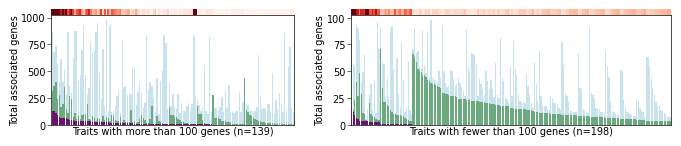

In [35]:
_, [[ax1a, ax2a], [ax1, ax2]] = plt.subplots(2, 2, figsize=(8, 1.5), sharex=False, gridspec_kw={'height_ratios': [1, 20], 'width_ratios':[150,198], 'hspace': 0})



order = [x for x in total_order if x in plot_df.trait_pair.values]
#plot_df[plot_df.variable=='n_overlap'].sort_values('value', ascending=False).trait_pair
sns.heatmap(np.array(plot_df[plot_df.variable=='total'].set_index('trait_pair').loc[order]['logp']).reshape(-1, 1).T, ax=ax1a, cbar=False, cmap='Reds', yticklabels=False, xticklabels=False,vmax=50, vmin=0)

sns.barplot(plot_df[plot_df.variable=='n_overlap'], x='trait_pair', y='value', color='purple', zorder=10, order=order, ax=ax1)
sns.barplot(plot_df[plot_df.variable=='overlap+rare'], x='trait_pair', y='value', color='green', zorder=5, order=order, ax=ax1, alpha=0.5)
sns.barplot(plot_df[plot_df.variable=='total'], x='trait_pair', y='value', color='skyblue', zorder=1, order=order, ax=ax1, alpha=0.5)
ax1.set_xticks([])


plot_df2 =k9_df[(k9_df.param_set=='defaults_9k')  & (k9_df.total <= 100)].melt(id_vars=['trait_pair', 'pval', 'logp'], value_vars=['n_overlap', 'overlap+rare', 'total'])
order = [x for x in total_order if x in plot_df2.trait_pair.values]
#plot_df2[plot_df2.variable=='n_overlap'].sort_values('value', ascending=False).trait_pair

print(len(order))
sns.heatmap(np.array(plot_df2[plot_df2.variable=='total'].set_index('trait_pair').loc[order]['logp']).reshape(-1, 1).T, ax=ax2a, cbar=False, cmap='Reds', yticklabels=False, xticklabels=False, vmax=10, vmin=0)

sns.barplot(plot_df2[plot_df2.variable=='n_overlap'], x='trait_pair', y='value', color='purple', zorder=10, order=order, ax=ax2)
sns.barplot(plot_df2[plot_df2.variable=='overlap+rare'], x='trait_pair', y='value', color='green', zorder=5, order=order, ax=ax2, alpha=0.5)
sns.barplot(plot_df2[plot_df2.variable=='total'], x='trait_pair', y='value', color='skyblue', zorder=1, order=order, ax=ax2, alpha=0.5)
ax2.set_xticks([])
ax1.set_xlabel('Traits with more than 100 genes (n=139)')
ax2.set_xlabel('Traits with fewer than 100 genes (n=198)')
ax1.set_ylabel('Total associated genes')
ax2.set_ylabel('Total associated genes')
plt.savefig(os.path.join(figdir, 'overlap_summary_9k_v2.jpg'), dpi=400, bbox_inches='tight')

In [ ]:
plot_df.trait_pair.nunique()

In [ ]:
plot_df2.trait_pair.nunique()

In [ ]:
_ = plt.figure(figsize=(6, 4))
sns.heatmap(np.array(plot_df2[plot_df2.variable=='total'].set_index('trait_pair').loc[order]['logp']).reshape(-1, 1).T, cbar=True, cmap='Reds', yticklabels=False, xticklabels=False, vmax=50, vmin=0)
plt.savefig(os.path.join(figdir, 'overlap_summary_9k_colorbar.jpg'), dpi=400, bbox_inches='tight')

## Venn Diagrams

In [ ]:
traits = ['EFO_0004570', 'EFO_0009961', 'EFO_0004630',  'EFO_0000612',  'EFO_0000400', 'EFO_0000756', 'EFO_0000684', ]
trait_pairs = [f'{x}_{x}' for x in traits]

In [ ]:
k9_df[(k9_df.trait_pair==trait_pairs[i]) & (k9_df.param_set=='sig_only_9k')].loc[:, ('rare_only', 'common_only', 'n_overlap')].values

In [ ]:
_, [[ax1,ax2,ax3,ax4], [ax5, ax6, ax7, ax8]] = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
for i in range(len(trait_pairs)):
    trait_info = k9_df[(k9_df.trait_pair==trait_pairs[i]) & (k9_df.param_set=='sig_only_9k')]
    subsets = trait_info.loc[:, ('rare_only', 'common_only', 'n_overlap')].values[0]
    v = venn2(subsets=subsets, set_labels=('Rare', 'Common'), ax=eval(f'ax{i+1}'))
    eval(f'ax{i+1}').set_title(traits[i])
    v.get_patch_by_id('10').set_color('mediumseagreen')
    v.get_patch_by_id('01').set_color('dodgerblue')
    v.get_patch_by_id('11').set_color('purple')


In [ ]:
overlap_df.head()

## Development

In [ ]:
rv_gene_counts 

In [ ]:
with open(os.path.join(input_dir,'overlap_traits_Jun17.txt'), 'r') as f:
    traits = f.read().splitlines()

In [ ]:
df.head()

In [ ]:
def compare_common_rare_genes(traits, rare_th=1, common_th=1, count_th=1, background=20000):
    rare_variants = {'ensembl':{}, 'symbol':{}}
    for trait in traits:
        df = pd.read_csv(os.path.join(input_dir,trait+'_RV.txt'), sep='\t')
        df = df[df['P-value']<=rare_th]
        rare_variants['ensembl'][trait] = df['Ensembl ID'].unique()
        rare_variants['symbol'][trait] = df['Gene Symbol'].unique()
    common_variants = {'ensembl':{}, 'symbol':{}}
    for trait in traits:
        df = pd.read_csv(os.path.join(input_dir,trait+'_CV.txt'), sep='\t')
        df = df[df['P-value']<=common_th]
        common_variants['ensembl'][trait] = df['Ensembl ID'].unique()
        common_variants['symbol'][trait] = df['Gene Symbol'].unique()
    shared_variants = {'ensembl':{}, 'symbol':{}}
    for trait in traits:
        shared_variants['ensembl'][trait] = len(np.intersect1d(rare_variants['ensembl'][trait], common_variants['ensembl'][trait]))
        shared_variants['symbol'][trait] = len(np.intersect1d(rare_variants['symbol'][trait], common_variants['symbol'][trait]))
    gene_comparison = pd.DataFrame({'ensembl':shared_variants['ensembl'], 'symbol':shared_variants['symbol']})
    gene_comparison = gene_comparison.assign(Rare_ensembl = [len(rare_variants['ensembl'][trait]) for trait in traits])
    gene_comparison = gene_comparison.assign(Rare_symbol = [len(rare_variants['symbol'][trait]) for trait in traits])
    gene_comparison = gene_comparison.assign(Common_ensembl = [len(common_variants['ensembl'][trait]) for trait in traits])
    gene_comparison = gene_comparison.assign(Common_symbol = [len(common_variants['symbol'][trait]) for trait in traits])
    gene_comparison = gene_comparison.loc[(gene_comparison['Rare_ensembl'] >= count_th) & (gene_comparison['Common_ensembl'] >= count_th)].copy()
    gene_comparison['hypergeom_ensembl'] = gene_comparison.apply(lambda x: hypergeom.sf(k=x['ensembl'], N=x['Rare_ensembl'], n=x['Common_ensembl'], M=background), axis=1)
    gene_comparison['hypergeom_symbol'] = gene_comparison.apply(lambda x: hypergeom.sf(k=x['symbol'], N=x['Rare_symbol'], n=x['Common_symbol'], M=background), axis=1)
    gene_comparison['BH_ensembl'] = multipletests(gene_comparison['hypergeom_ensembl'], method='fdr_bh')[1]
    gene_comparison['BH_symbol'] = multipletests(gene_comparison['hypergeom_symbol'], method='fdr_bh')[1]
    print('Total comparisons:', gene_comparison.shape[0])
    print('Median q value:', gene_comparison['BH_ensembl'].median())
    return gene_comparison

In [ ]:
gene_comparison = compare_common_rare_genes(traits, count_th=4)

In [ ]:
gene_comparison_sig_CV = compare_common_rare_genes(traits, count_th=4, common_th=5e-8)

In [ ]:
gene_comparison.BH_ensembl.median()

In [ ]:
sns.histplot(gene_comparison['BH_ensembl'], bins=50, log_scale=True)
plt.xlim(1e-100, 1e-0)

In [ ]:
gene_comparison.sort_values('BH_ensembl').head(50)